<h1 style="background-color:DodgerBlue;"> Anamoly detection || Machine Learning:: DBSCAN</h1>

## 🧪 **Scenario: E-commerce Spending Pattern Anomaly Detection with DBSCAN**
- High-dimensional: 6 features
- Goal: Detect fraud transactions

**E-commerce Transaction data** — it has multiple features like:
These features are great for detecting anomalies like:
- Spending surges  
- Refund ratio anomalies 
- Transactional frequency inconsistencies


### 📦 **1. Get Data**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed
np.random.seed(42)

# Normal user behavior
normal_data, _ = make_blobs(n_samples=400, centers=[[50, 5, 20, 0.02, 0.3]], cluster_std=[3.0], n_features=5)

# Injected anomalies
anomalies = np.array([
    [150, 30, 80, 0.9, 0.9],
    [10, 50, 1, 0.01, 0.05],
    [100, 2, 120, 0.05, 0.7],
    [30, 100, 5, 0.8, 0.1]
])

# Combine
X = np.vstack((normal_data, anomalies))
columns = ['daily_avg_spend', 'transactions_per_day', 'avg_transaction_amount', 'refund_ratio', 'weekend_spend_ratio']
df = pd.DataFrame(X, columns=columns)
df['is_anomaly'] = 0
df.loc[df.index[-len(anomalies):], 'is_anomaly'] = 1

### ⚙️ **2. Preprocess and Run DBSCAN**

In [2]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[columns])

# Fit DBSCAN
db = DBSCAN(eps=1.3, min_samples=10)
labels = db.fit_predict(X_scaled)
df['dbscan_label'] = labels
df['dbscan_anomaly'] = (df['dbscan_label'] == -1).astype(int)

### 📊 **3. Visualize Detected Anomalies**

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


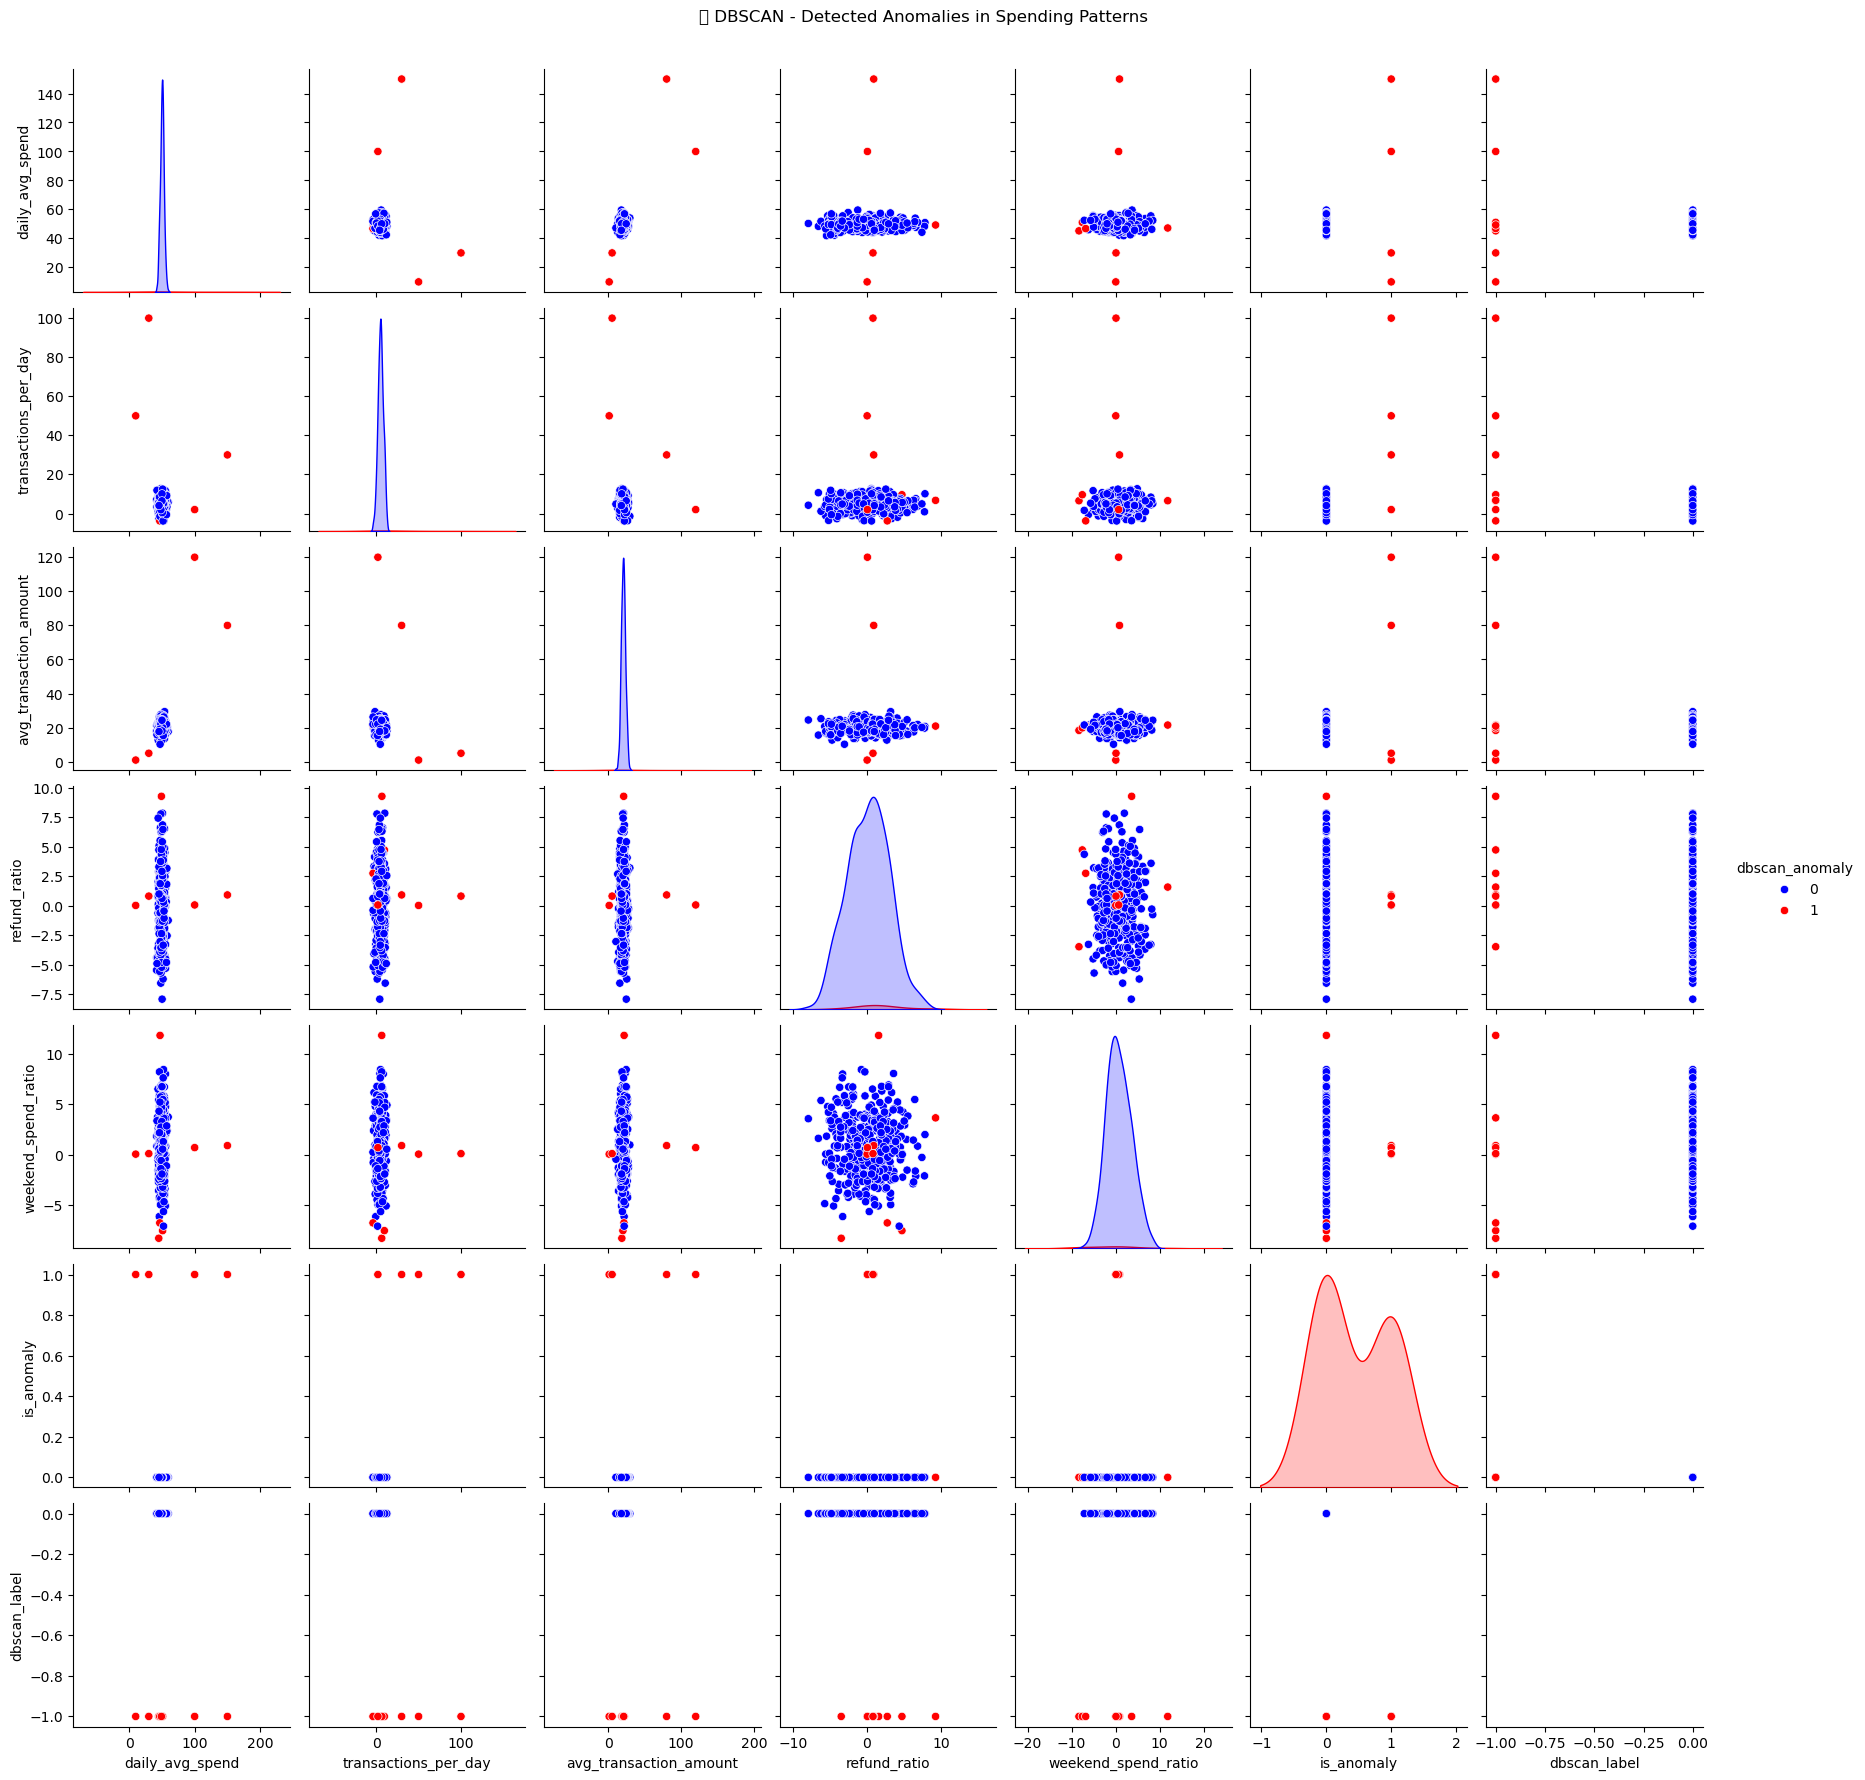

In [3]:
sns.pairplot(df, hue='dbscan_anomaly', diag_kind='kde', palette={0: 'blue', 1: 'red'})
plt.suptitle("💳 DBSCAN - Detected Anomalies in Spending Patterns", y=1.02)
plt.show()


### 💾 **4. Export Detected Anomalies**

In [4]:
# Save
anomalies_detected = df[df['dbscan_anomaly'] == 1]
anomalies_detected.to_csv("dbscan_detected_anomalies.csv", index=False)
print(f"✅ Saved {len(anomalies_detected)} anomalies to 'dbscan_detected_anomalies.csv'")

✅ Saved 9 anomalies to 'dbscan_detected_anomalies.csv'


### 🧪 **5. Test a New Suspicious Spending Sample**

In [5]:
# New suspicious data
new_data = pd.DataFrame([[140, 25, 100, 0.8, 0.85]], columns=columns)

# Preprocess
new_scaled = scaler.transform(new_data)

# Refit DBSCAN on all data (X_scaled + test point)
X_test_all = np.vstack([X_scaled, new_scaled])
db_test = DBSCAN(eps=1.3, min_samples=10)
test_labels = db_test.fit_predict(X_test_all)

# Check if the last point (test sample) is labeled as an outlier
is_anomaly = test_labels[-1] == -1
print("🚨 Suspicious test point is anomalous?", is_anomaly)


🚨 Suspicious test point is anomalous? True
